In [54]:
#imports
import os
import urllib
from io import StringIO
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import HTML
from colorthief import ColorThief
%matplotlib inline  

In [3]:
filename = 'data/test/406.jpg'

In [9]:
OpenImg = Image.open(filename)

In [8]:
#helper function
def compute_average_image_color(img):
    width, height = img.size
    count, r_total, g_total, b_total = 0, 0, 0, 0
    for x in range(0, width):
        for y in range(0, height):
            r, g, b = img.getpixel((x,y))
            r_total += r
            g_total += g
            b_total += b
            count += 1
    return (r_total/count, g_total/count, b_total/count)

In [ ]:
#create avg colors and pallets
average_colors = {}
pallets = []

PATH_TO_TEST_IMAGES_DIR = './data/validation'
#ends with 9897
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, '{}.jpg'.format(i)) for i in range(9847,len([name for name in os.listdir(PATH_TO_TEST_IMAGES_DIR) if os.path.isfile(os.path.join(PATH_TO_TEST_IMAGES_DIR, name))])+1) ]

print("most dominant colors:")
for image_path in TEST_IMAGE_PATHS:
    OpenImg = Image.open(image_path)
    filename = image_path
    #compute avg colors
    average_color = compute_average_image_color(OpenImg)
    if average_color not in average_colors:
        average_colors[average_color] = 0
    average_colors[average_color] += 1
    #compute dominant colors
    color_thief = ColorThief(filename)
    dominant_color = color_thief.get_color(quality=1)
    image_url = "<span style='display:inline-block; min-width:200px; background-color:rgb"+str(dominant_color)+";padding:10px 10px;'>"+str(dominant_color)+"</span>"
    display(HTML(image_url))
   
    palette = color_thief.get_palette(color_count=6)
    pallets.append(palette)

#print colors
print("average colors coming up!")
for average_color in average_colors:
    average_color1 = (int(average_color[0]),int(average_color[1]),int(average_color[2]))
    image_url = "<span style='display:inline-block; min-width:200px; background-color:rgb"+str(average_color1)+";padding:10px 10px;'>"+str(average_color1)+"</span>"
#     print (image_url)
    
    #display((image_url))
    display(HTML(image_url))

#print pallets
print("pallets coming up!")
for pallet in pallets:
    img_url = ""
    for pall in pallet:
        img_url += "<span style='background-color:rgb"+str(pall)+";padding:20px 10px;'>"+str(pall)+"</span>"
    img_url += "<br>"
    display(HTML(img_url))
    #for some reason inline doesn't work here so manually add a new line between pallets
    print ()
    


most dominant colors:


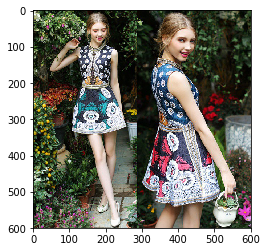

In [49]:
imgplot = plt.imshow(OpenImg)